## Airbnb rental analysis of Los Angeles city in California


In [1]:
import pandas as pd
import numpy as np

## Import data

In [2]:
data = pd.read_csv('Coello-Camarero_Hashemi_Zarzuela_DB3.csv')
print(data.head())

     id                        listing_url     scrape_id last_scraped  \
0   109   https://www.airbnb.com/rooms/109  2.021120e+13    12/6/2021   
1  2708  https://www.airbnb.com/rooms/2708  2.021120e+13    12/6/2021   
2  2732  https://www.airbnb.com/rooms/2732  2.021120e+13    12/6/2021   
3  2864  https://www.airbnb.com/rooms/2864  2.021120e+13    12/6/2021   
4  3021  https://www.airbnb.com/rooms/3021  2.021120e+13    12/7/2021   

                                                name  \
0  Amazing bright elegant condo park front *UPGRA...   
1  Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...   
2                              Zen Life at the Beach   
3             * Beautiful Master Suite/Jacuzzi Tub/*   
4    Hollywood Hills Zen Modern style Apt/Guesthouse   

                                         description  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  Run Runyon Canyon, Our Gym & Sauna Open <br />...   
2  An oasis of tranquility awaits you.<br /><br /...   


# In this part, we eliminate some columns that can not play important roles in our analysis. It will reduce the computaional cost.

In [3]:
data.drop(['listing_url','scrape_id','name','picture_url','host_url','host_thumbnail_url','host_picture_url','host_verifications'], axis=1, inplace=True)
print(data.head())

     id last_scraped                                        description  \
0   109    12/6/2021  *** Unit upgraded with new bamboo flooring, br...   
1  2708    12/6/2021  Run Runyon Canyon, Our Gym & Sauna Open <br />...   
2  2732    12/6/2021  An oasis of tranquility awaits you.<br /><br /...   
3  2864    12/6/2021  Centrally located.... Furnished with King Size...   
4  3021    12/7/2021  A very Modern Hollywood Hills Zen style galler...   

                               neighborhood_overview  host_id       host_name  \
0                                                NaN      521           Paolo   
1  Walk and run to Runyon Canyon, it is open!<br ...     3008           Chas.   
2  This is the best part of Santa Monica. Quiet, ...     3041  Yoga Priestess   
3  What makes the neighborhood unique is that the...     3207       Bernadine   
4  This is the famous Hollywood hills.. Historica...     3415         Nataraj   

  host_since                             host_location  \
0  6

## In this step we need to correct some data type and style in order to use them in our analysis. We need to eliminate $ sign from the price column and also change its format to float

In [4]:
data['price'] = data['price'].replace({r'\$':''}, regex = True)

In [5]:
data['price'].tolist()

['115.00 ',
 '89.00 ',
 '167.00 ',
 '50.00 ',
 '118.00 ',
 '50.00 ',
 '65.00 ',
 '130.00 ',
 '89.00 ',
 '109.00 ',
 '117.00 ',
 '80.00 ',
 '85.00 ',
 '74.00 ',
 '88.00 ',
 '195.00 ',
 '95.00 ',
 '153.00 ',
 '312.00 ',
 '160.00 ',
 '149.00 ',
 '495.00 ',
 '282.00 ',
 '207.00 ',
 '75.00 ',
 '129.00 ',
 '229.00 ',
 '209.00 ',
 '188.00 ',
 '297.00 ',
 '212.00 ',
 '130.00 ',
 '160.00 ',
 '305.00 ',
 '93.00 ',
 '89.00 ',
 '94.00 ',
 '289.00 ',
 '90.00 ',
 '59.00 ',
 '175.00 ',
 '188.00 ',
 '1,200.00 ',
 '125.00 ',
 '106.00 ',
 '303.00 ',
 '61.00 ',
 '59.00 ',
 '46.00 ',
 '155.00 ',
 '50.00 ',
 '70.00 ',
 '54.00 ',
 '135.00 ',
 '70.00 ',
 '150.00 ',
 '300.00 ',
 '450.00 ',
 '100.00 ',
 '70.00 ',
 '110.00 ',
 '75.00 ',
 '156.00 ',
 '100.00 ',
 '150.00 ',
 '155.00 ',
 '85.00 ',
 '189.00 ',
 '135.00 ',
 '69.00 ',
 '417.00 ',
 '78.00 ',
 '131.00 ',
 '220.00 ',
 '134.00 ',
 '375.00 ',
 '901.00 ',
 '113.00 ',
 '47.00 ',
 '114.00 ',
 '57.00 ',
 '75.00 ',
 '130.00 ',
 '125.00 ',
 '110.00 ',
 '119.00 

## Now, we change the type of price column.

In [6]:

data["price"] = [float(str(i).replace(",", "")) for i in data["price"]]

In [7]:
data.price

0        115.0
1         89.0
2        167.0
3         50.0
4        118.0
         ...  
33324    155.0
33325    155.0
33326    155.0
33327    152.0
33328    143.0
Name: price, Length: 33329, dtype: float64

## In ordert to analze better the bathroom data in our analysis, we need to perform spliting and then getting dummies of bath column

In [7]:
data[['numberofbath','Bath']] = data.pop('bathrooms_text').str.split(n=1, expand=True)

In [8]:
data['numberofbath'] = pd.to_numeric(data['numberofbath'],errors='coerce')

In [10]:
data['numberofbath'].tolist()

[2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 3.5,
 1.0,
 1.0,
 1.0,
 1.5,
 1.5,
 11.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 nan,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.5,
 1.0,
 1.0,
 1.5,
 2.0,
 1.0,
 1.0,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.5,
 1.0,
 1.0,
 1.0,
 4.0,
 1.0,
 11.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 11.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.5,
 2.5,
 2.0,
 

In [11]:
data['Bath'].tolist()

['baths',
 'shared bath',
 'private bath',
 'bath',
 'bath',
 'shared bath',
 'shared bath',
 'bath',
 'bath',
 'shared bath',
 'bath',
 'shared baths',
 'shared bath',
 'baths',
 'private bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'shared bath',
 'baths',
 'bath',
 'private bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'shared bath',
 'shared bath',
 'bath',
 'shared baths',
 'bath',
 'bath',
 'bath',
 'baths',
 'bath',
 'bath',
 'bath',
 'shared baths',
 'shared baths',
 'shared baths',
 'bath',
 'shared baths',
 'shared bath',
 'private bath',
 'bath',
 'private bath',
 'bath',
 'baths',
 'shared bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'bath',
 'private bath',
 'bath',
 'shared bath',
 'private bath',
 'bath',
 'baths',
 'baths',
 'bath',
 'bath',
 'baths',
 'bath',
 'baths',
 nan,
 'private bath',
 'shared baths',
 'bath',
 'shared bath',
 'shared bath',
 'bath',
 'bath',
 nan,
 'bath',
 'bath',
 'p

In [12]:
data.groupby('Bath').size()

Bath
bath            14537
baths           10123
half-bath          37
private bath     3422
shared bath      3594
shared baths     1518
dtype: int64

In [13]:
pd.get_dummies(data['Bath'].str.split('|').apply(pd.Series).stack()).sum(level=0)

,bath,baths,half-bath,private bath,shared bath,shared baths
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
33324,1,0,0,0,0,0
33325,1,0,0,0,0,0
33326,1,0,0,0,0,0
33327,1,0,0,0,0,0


## We need to seperate and get dummies for bath data in order to use them in correlation analysis.

In [9]:
data = pd.get_dummies(data, prefix=['Bath'], columns=['Bath'])

In [15]:
data

,id,last_scraped,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,private-rooms,shared-rooms,reviews_per_month,numberofbath,Bath_bath,Bath_baths,Bath_half-bath,Bath_private bath,Bath_shared bath,Bath_shared baths
0,109,12/6/2021,"*** Unit upgraded with new bamboo flooring, br...",NaN,521,Paolo,6/27/2008,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,...,0,0,0.02,2.0,0,1,0,0,0,0
1,2708,12/6/2021,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",3008,Chas.,9/16/2008,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,...,3,0,0.69,1.0,0,0,0,0,1,0
2,2732,12/6/2021,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",3041,Yoga Priestess,9/17/2008,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,...,1,0,0.35,1.0,0,0,0,1,0,0
3,2864,12/6/2021,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,3207,Bernadine,9/25/2008,"Bellflower, California, United States","Fair, open, honest and very informative for ne...",NaN,...,0,0,NaN,1.0,1,0,0,0,0,0
4,3021,12/7/2021,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,3415,Nataraj,10/2/2008,"Los Angeles, California, United States","Music Industry, Record producer, Songwriter, C...",NaN,...,3,0,0.23,1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33324,53683908,12/6/2021,<b>License number</b><br />Exempt - This listi...,NaN,16760875,Alex,6/13/2014,"Beverly Hills, California, United States",My name is Alex. It's been a while since I sta...,within an hour,...,0,0,NaN,1.0,1,0,0,0,0,0
33325,53684062,12/7/2021,<b>License number</b><br />Exempt - This listi...,NaN,16760875,Alex,6/13/2014,"Beverly Hills, California, United States",My name is Alex. It's been a while since I sta...,within an hour,...,0,0,NaN,1.0,1,0,0,0,0,0
33326,53684370,12/6/2021,<b>License number</b><br />Exempt - This listi...,NaN,16760875,Alex,6/13/2014,"Beverly Hills, California, United States",My name is Alex. It's been a while since I sta...,within an hour,...,0,0,NaN,1.0,1,0,0,0,0,0
33327,53684541,12/6/2021,Beautiful design 1 Bedroom Apartment in Hollyw...,NaN,375448432,Eva,11/12/2020,US,NaN,within an hour,...,1,0,NaN,1.0,1,0,0,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            33329 non-null  int64  
 1   last_scraped                  33329 non-null  object 
 2   description                   32231 non-null  object 
 3   neighborhood_overview         20108 non-null  object 
 4   host_id                       33329 non-null  int64  
 5   host_name                     33322 non-null  object 
 6   host_since                    33322 non-null  object 
 7   host_location                 33246 non-null  object 
 8   host_about                    19689 non-null  object 
 9   host_response_time            22467 non-null  object 
 10  host_response_rate            22467 non-null  object 
 11  host_acceptance_rate          23006 non-null  object 
 12  host_is_superhost             33322 non-null  object 
 13  h

In [17]:
# Taking care of missing values

In [18]:
data.shape

(33329, 72)

In [19]:
# We need to find the total number of null for each columns

In [20]:
data.isnull().sum().tolist()

[0,
 0,
 1098,
 13221,
 0,
 7,
 7,
 83,
 13640,
 10862,
 10862,
 10323,
 7,
 6619,
 7,
 7,
 7,
 7,
 13220,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 33329,
 3745,
 1810,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 33329,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8010,
 8010,
 8010,
 8338,
 8337,
 8346,
 8338,
 8349,
 8351,
 24925,
 0,
 0,
 0,
 0,
 0,
 8010,
 135,
 0,
 0,
 0,
 0,
 0,
 0]

# Replacing missing values
## As reviews columns are significant elements in our analysis, we need take care of missing values in these columns

## We want to find the correlation between all attributes

In [21]:
corrr = data.corr()

In [22]:
corrr

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,private-rooms,shared-rooms,reviews_per_month,numberofbath,Bath_bath,Bath_baths,Bath_half-bath,Bath_private bath,Bath_shared bath,Bath_shared baths
id,1.000000,0.522134,0.128923,0.128923,-0.008147,0.054496,0.128148,NaN,0.103976,0.091459,...,0.116139,0.015997,0.102663,0.083320,-0.054759,0.105244,0.008414,-0.043279,-0.029407,0.000022
host_id,0.522134,1.000000,0.006817,0.006817,-0.013883,0.118963,0.064228,NaN,0.021812,0.050922,...,0.037435,-0.007877,0.063461,0.022948,-0.078323,0.034373,0.009444,0.036864,0.021232,0.022301
host_listings_count,0.128923,0.006817,1.000000,1.000000,-0.011415,-0.050129,-0.027160,NaN,-0.039463,-0.047709,...,0.055942,-0.009908,-0.033754,-0.013272,0.069022,0.014040,-0.004944,-0.054848,-0.054989,-0.030471
host_total_listings_count,0.128923,0.006817,1.000000,1.000000,-0.011415,-0.050129,-0.027160,NaN,-0.039463,-0.047709,...,0.055942,-0.009908,-0.033754,-0.013272,0.069022,0.014040,-0.004944,-0.054848,-0.054989,-0.030471
latitude,-0.008147,-0.013883,-0.011415,-0.011415,1.000000,-0.068696,-0.015998,NaN,0.003673,-0.023446,...,0.076542,-0.010645,-0.030310,0.024027,-0.018151,-0.004062,0.002481,0.009971,0.022552,-0.001605
longitude,0.054496,0.118963,-0.050129,-0.050129,-0.068696,1.000000,-0.091394,NaN,-0.115843,-0.075884,...,-0.038706,-0.001708,0.003203,-0.112834,-0.072664,-0.105355,0.038978,0.088231,0.118811,0.089365
accommodates,0.128148,0.064228,-0.027160,-0.027160,-0.015998,-0.091394,1.000000,NaN,0.838308,0.801916,...,-0.027583,-0.059205,0.030664,0.639636,-0.238719,0.622850,-0.025075,-0.201747,-0.253917,-0.125859
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.103976,0.021812,-0.039463,-0.039463,0.003673,-0.115843,0.838308,NaN,1.000000,0.786432,...,-0.082869,-0.074516,0.009042,0.752495,-0.316288,0.668017,-0.020921,-0.202916,-0.220511,-0.121640
beds,0.091459,0.050922,-0.047709,-0.047709,-0.023446,-0.075884,0.801916,NaN,0.786432,1.000000,...,-0.020171,0.045893,0.017615,0.609724,-0.277427,0.549782,-0.021584,-0.176347,-0.185074,-0.029484


In [23]:
with np.printoptions(edgeitems=50):
    print(corrr)

                                   id   host_id  host_listings_count  \
id                           1.000000  0.522134             0.128923   
host_id                      0.522134  1.000000             0.006817   
host_listings_count          0.128923  0.006817             1.000000   
host_total_listings_count    0.128923  0.006817             1.000000   
latitude                    -0.008147 -0.013883            -0.011415   
longitude                    0.054496  0.118963            -0.050129   
accommodates                 0.128148  0.064228            -0.027160   
bathrooms                         NaN       NaN                  NaN   
bedrooms                     0.103976  0.021812            -0.039463   
beds                         0.091459  0.050922            -0.047709   
price                        0.042688  0.010505            -0.009295   
minimum_nights              -0.065270 -0.068467             0.037997   
maximum_nights              -0.031062 -0.075274             0.09

## Based on achieved results, for columns about reviews, 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value', there are just strong correlations between themselves and no strong correlation between them and other columns. For taking care of missing values, one way is use regression technique for finding these null values based on other attributes.

## First of all, we create a new dataset for reviews. Then, we prepare data for training and testing.

In [24]:
msigvol = data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].copy()

In [25]:
print(msigvol.shape)

(33329, 7)


In [26]:
testd = msigvol[msigvol['review_scores_rating'].isnull()]
print(testd.shape)

(8010, 7)


In [27]:
msigvol = msigvol.dropna()
print(msigvol.shape)

(24978, 7)


In [28]:
y_train = msigvol['review_scores_rating']
X_train = msigvol.drop("review_scores_rating", axis=1)
X_test = testd.drop("review_scores_rating", axis=1)
print(X_train.head())

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    5.00                       5.00                   3.00   
1                    4.79                       4.91                   5.00   
2                    4.45                       4.57                   4.65   
4                    4.04                       3.83                   3.96   
5                    4.88                       4.85                   4.91   

   review_scores_communication  review_scores_location  review_scores_value  
0                         4.00                    5.00                 4.00  
1                         4.97                    5.00                 4.85  
2                         4.70                    4.90                 4.40  
4                         4.30                    4.64                 4.00  
5                         4.92                    4.79                 4.70  


In [29]:
X_test.shape

(8010, 6)

In [30]:
X_test.dropna()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value


## As we can see, in the testing data which was made by a dataset that all values of 'review_scores_rating' is null (that we want to predict null values and replace the prediction values instead of null values), when we droped NaN, the dataset would be empty. Based on the achieved results, in observations (rows) that we have null values for 'review_scores_rating', we donot have values for 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value', too. Then we can not predict null values for for these attributes based on attributes that have meaningfull correlation with each other. In below we are going to see how we can get error in prediction.   

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)

In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_train)
r2

0.7908852567279926

In [34]:
y_pred = lr.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## In this step, we need to  to eliminate all null values which means we are going to lose part of our data.

In [10]:
data.replace('N/A', np.nan, inplace = True)

In [11]:
data = data.dropna(axis=0, subset=['review_scores_rating'])

In [12]:
data = data.dropna(axis=0, subset=['review_scores_accuracy'])

In [13]:
data = data.dropna(axis=0, subset=['review_scores_cleanliness'])

In [14]:
data = data.dropna(axis=0, subset=['review_scores_checkin'])

In [15]:
data = data.dropna(axis=0, subset=['review_scores_communication'])

In [16]:
data = data.dropna(axis=0, subset=['review_scores_location'])

In [17]:
data = data.dropna(axis=0, subset=['review_scores_value'])

In [18]:
data.shape

(24978, 72)

## Now we need to define an element for showing rental demand since we do not have aby specific attributes in our dataset to show this element,
## We select 'availability_90' column which shows number of days available for each rental in the next 90 days. we need to do some changes on the values of this attribute to make it ready for showing demanding. We are going to define a new attribite for our dataset as demanding rate.

In [19]:
data["demanding_rate"] = ((90 - data["availability_90"])/90)*100

In [44]:
data.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,shared-rooms,reviews_per_month,numberofbath,Bath_bath,Bath_baths,Bath_half-bath,Bath_private bath,Bath_shared bath,Bath_shared baths,demanding_rate
0,109,12/6/2021,"*** Unit upgraded with new bamboo flooring, br...",NaN,521,Paolo,6/27/2008,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,...,0,0.02,2.0,0,1,0,0,0,0,100.000000
1,2708,12/6/2021,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",3008,Chas.,9/16/2008,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,...,0,0.69,1.0,0,0,0,0,1,0,42.222222
2,2732,12/6/2021,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",3041,Yoga Priestess,9/17/2008,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,...,0,0.35,1.0,0,0,0,1,0,0,6.666667
4,3021,12/7/2021,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,3415,Nataraj,10/2/2008,"Los Angeles, California, United States","Music Industry, Record producer, Songwriter, C...",NaN,...,0,0.23,1.0,1,0,0,0,0,0,63.333333
5,5728,12/7/2021,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,9171,Sanni,3/5/2009,"Los Angeles, California, United States",we are loving our home and would like to share...,within a few hours,...,0,4.25,1.0,0,0,0,0,1,0,34.444444


## We want to get all correlations again.

In [45]:
dd = data.corr()

In [46]:
with np.printoptions(edgeitems=50):
    print(dd)

                                   id   host_id  host_listings_count  \
id                           1.000000  0.527209             0.085609   
host_id                      0.527209  1.000000            -0.012676   
host_listings_count          0.085609 -0.012676             1.000000   
host_total_listings_count    0.085609 -0.012676             1.000000   
latitude                    -0.020460 -0.022346            -0.016130   
longitude                    0.097024  0.148014            -0.043601   
accommodates                 0.106296  0.064845            -0.013489   
bathrooms                         NaN       NaN                  NaN   
bedrooms                     0.087394  0.029015            -0.017368   
beds                         0.079714  0.060589            -0.024957   
price                        0.034136 -0.002623            -0.004950   
minimum_nights              -0.119763 -0.106355             0.031590   
maximum_nights              -0.018361 -0.056658             0.08

## Now we want to check the relation between rating and rental demand

In [47]:
q2 = data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','demanding_rate']].copy()

In [48]:
q2.shape

(24978, 8)

In [49]:
q2 = q2.dropna(axis=0, subset=['demanding_rate'])

In [50]:
q2.shape

(24978, 8)

In [51]:
q2.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,demanding_rate
review_scores_rating,1.000000,0.845404,0.793854,0.730880,0.788292,0.669029,0.841756,0.097721
review_scores_accuracy,0.845404,1.000000,0.762757,0.743533,0.765698,0.673455,0.813678,0.103691
review_scores_cleanliness,0.793854,0.762757,1.000000,0.631204,0.662884,0.594033,0.734487,0.051208
review_scores_checkin,0.730880,0.743533,0.631204,1.000000,0.791995,0.643383,0.698989,0.096798
review_scores_communication,0.788292,0.765698,0.662884,0.791995,1.000000,0.648345,0.735675,0.093165
review_scores_location,0.669029,0.673455,0.594033,0.643383,0.648345,1.000000,0.686093,0.082309
review_scores_value,0.841756,0.813678,0.734487,0.698989,0.735675,0.686093,1.000000,0.112769
demanding_rate,0.097721,0.103691,0.051208,0.096798,0.093165,0.082309,0.112769,1.000000


## Based on achieved results, there are week correlation among rental demnad and review_scores_value, review_scores_accuracy, review_scores_rating, review_scores_checkin and having bath in a propoety . And also, there is no meaningful correlation between other fatores here and demanding rate.

## If we want to take a look into the all correlations for the demanding rate

In [52]:
q22 = data[data.columns[1:]].corr()['demanding_rate'][:]

In [53]:
q22.nlargest(20)

demanding_rate                 1.000000
review_scores_value            0.112769
review_scores_accuracy         0.103691
review_scores_rating           0.097721
review_scores_checkin          0.096798
Bath_bath                      0.096074
review_scores_communication    0.093165
review_scores_location         0.082309
review_scores_cleanliness      0.051208
minimum_nights_avg_ntm         0.027954
maximum_minimum_nights         0.025898
minimum_minimum_nights         0.024340
number_of_reviews              0.021981
minimum_nights                 0.021081
maximum_nights                 0.011681
longitude                      0.009415
host_listings_count            0.006977
host_total_listings_count      0.006977
latitude                      -0.006292
Bath_half-bath                -0.008251
Name: demanding_rate, dtype: float64

## The most meaningful correlations for demanding rate are those with reviews which all of the correlations are weak.

## Now we want to check if rents are influenced by the rating system

In [54]:
q3 = data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','price']].copy()

In [55]:
q3.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
review_scores_rating,1.000000,0.845404,0.793854,0.730880,0.788292,0.669029,0.841756,0.036700
review_scores_accuracy,0.845404,1.000000,0.762757,0.743533,0.765698,0.673455,0.813678,0.015624
review_scores_cleanliness,0.793854,0.762757,1.000000,0.631204,0.662884,0.594033,0.734487,0.040014
review_scores_checkin,0.730880,0.743533,0.631204,1.000000,0.791995,0.643383,0.698989,0.015621
review_scores_communication,0.788292,0.765698,0.662884,0.791995,1.000000,0.648345,0.735675,0.013830
review_scores_location,0.669029,0.673455,0.594033,0.643383,0.648345,1.000000,0.686093,0.059313
review_scores_value,0.841756,0.813678,0.734487,0.698989,0.735675,0.686093,1.000000,-0.001002
price,0.036700,0.015624,0.040014,0.015621,0.013830,0.059313,-0.001002,1.000000


## Based on achieved results, there is no correlation between rents amount and rating systems.

## In this step, we would like to know which factors impact the pricing.

In [56]:
q4 = data[data.columns[1:]].corr()['price'][:]

In [57]:
q4.sort_values()

longitude                     -0.164739
Bath_bath                     -0.147732
Bath_shared bath              -0.116050
demanding_rate                -0.103982
Bath_shared baths             -0.082627
Bath_private bath             -0.076445
number_of_reviews             -0.054516
shared-rooms                  -0.044790
minimum_minimum_nights        -0.044567
minimum_nights                -0.044431
private-rooms                 -0.036542
minimum_nights_avg_ntm        -0.034159
maximum_minimum_nights        -0.033209
number_of_reviews_l30d        -0.018059
number_of_reviews_ltm         -0.013881
reviews_per_month             -0.010916
host_places_count             -0.009872
latitude                      -0.005189
host_listings_count           -0.004950
host_total_listings_count     -0.004950
host_id                       -0.002623
review_scores_value           -0.001002
minimum_maximum_nights         0.003166
maximum_nights_avg_ntm         0.003725
maximum_maximum_nights         0.003726


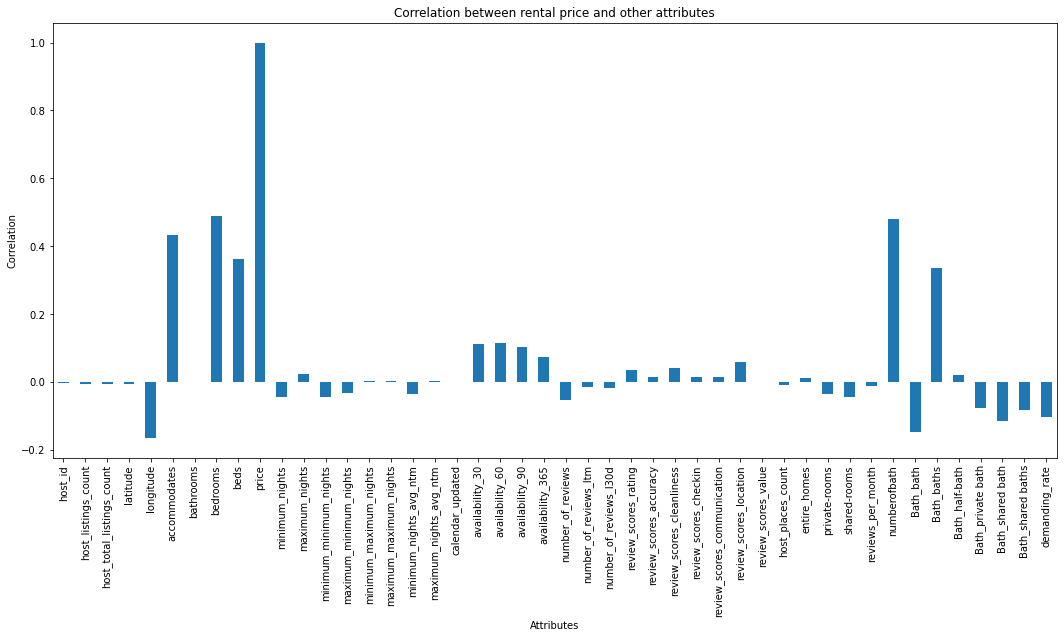

In [58]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.figure(figsize=(18,8))
q4.plot(kind = 'bar')
plt.ylabel('Correlation')
plt.xlabel('Attributes')
plt.title('Correlation between rental price and other attributes')
plt.show()

## Based on the obtained results, there are just moderate correlations between pricing and accomodations, number of bedrooms, number of beds and those places with more than one bath.

## In this step, we would like to split and get dumiies of neighborhood and property type since we would like to study them and their influences.

In [59]:
data = pd.get_dummies(data, prefix=['neighbourhood_cleansed'], columns=['neighbourhood_cleansed'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24978 entries, 0 to 33288
Columns: 336 entries, id to neighbourhood_cleansed_Woodland Hills
dtypes: float64(25), int64(16), object(25), uint8(270)
memory usage: 19.2+ MB


In [95]:
data = pd.get_dummies(data, prefix=['property_type'], columns=['property_type'])

In [62]:
data

,id,last_scraped,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,property_type_Shared room in townhouse,property_type_Shared room in villa,property_type_Shipping container,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Tower,property_type_Train,property_type_Treehouse,property_type_Yurt
0,109,12/6/2021,"*** Unit upgraded with new bamboo flooring, br...",NaN,521,Paolo,6/27/2008,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,...,0,0,0,0,0,0,0,0,0,0
1,2708,12/6/2021,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",3008,Chas.,9/16/2008,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within a few hours,...,0,0,0,0,0,0,0,0,0,0
2,2732,12/6/2021,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",3041,Yoga Priestess,9/17/2008,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,...,0,0,0,0,0,0,0,0,0,0
4,3021,12/7/2021,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,3415,Nataraj,10/2/2008,"Los Angeles, California, United States","Music Industry, Record producer, Songwriter, C...",NaN,...,0,0,0,0,0,0,0,0,0,0
5,5728,12/7/2021,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,9171,Sanni,3/5/2009,"Los Angeles, California, United States",we are loving our home and would like to share...,within a few hours,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33159,53632414,12/7/2021,This is an independent apartment with two bedr...,"We are located in the Chinese district, next t...",434315011,Jie,12/1/2021,CN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
33163,53632780,12/7/2021,This is a sunny and private master bedroom wit...,NaN,109192371,Mary,12/30/2016,"Torrance, California, United States",Hello and welcome to South Bay LA! My husband ...,within an hour,...,0,0,0,0,0,0,0,0,0,0
33207,53646927,12/7/2021,NaN,NaN,431636636,Tina,11/12/2021,"Los Angeles, California, United States",NaN,within an hour,...,0,0,0,0,0,0,0,0,0,0
33279,53664855,12/7/2021,NaN,NaN,426946658,Meifang,10/11/2021,TW,NaN,within an hour,...,0,0,0,0,0,0,0,0,0,0


In [63]:
q5 = data[data.columns[1:]].corr()['price'][:]

In [64]:
q5.nlargest(10)

price                                          1.000000
bedrooms                                       0.488219
numberofbath                                   0.481341
accommodates                                   0.432106
beds                                           0.360906
Bath_baths                                     0.335545
property_type_Entire villa                     0.320002
property_type_Entire residential home          0.259713
neighbourhood_cleansed_Malibu                  0.230947
neighbourhood_cleansed_Hollywood Hills West    0.160652
Name: price, dtype: float64

## As we can see, there is meaningful correlation among price and number of bedrooms, number of bath, property_type_Entire villa (when the type of rental is villa, numbe), accomodation numbers, number of beds and if the property has more than one bath.

In [65]:
q55 = data[data.columns[1:]].corr()['demanding_rate'][:]

In [66]:
q55.nlargest(10)

demanding_rate                        1.000000
review_scores_value                   0.112769
review_scores_accuracy                0.103691
review_scores_rating                  0.097721
review_scores_checkin                 0.096798
Bath_bath                             0.096074
review_scores_communication           0.093165
review_scores_location                0.082309
neighbourhood_cleansed_Silver Lake    0.067508
neighbourhood_cleansed_Echo Park      0.057440
Name: demanding_rate, dtype: float64

## As we can see there is no change for demanding.

## For analyzing relationship between price, demanding and amenities, we want to try again with make the dataset smaller.

In [67]:
q6 = data[['price', 'demanding_rate', 'review_scores_cleanliness', 'amenities']].copy()

## If we want to get dummies for amenities:

In [ ]:
q6 = pd.get_dummies(q6, prefix=['amenities'], columns=['amenities'])

In [ ]:
q6.shape

In [ ]:
q66 = q6[q6.columns[1:]].corr()['demanding_rate'][:]

## As we can see, there is not feasible to analyze amenities by details since this attribute conyains a huge amount of data and if we want to split it and det dummiies, we need some specific professional software for big data.

In [ ]:
data.shape

In [ ]:
data['amenities'].describe()

## As a surrogate, we can count number of amenities for each rental and see if the number of amenities is correlated with price of rentals or other desired elements.

In [20]:
data['number_of_amenities'] = data['amenities'].str.split().str.len()

In [21]:
data['number_of_amenities']

0        46
1        87
2        29
4        44
5        44
         ..
33159    35
33163    74
33207    66
33279    46
33288    52
Name: number_of_amenities, Length: 24978, dtype: int64

In [70]:
data['demanding_rate'].corr(data['number_of_amenities'])

-0.1106758561848045

In [71]:
data['price'].corr(data['number_of_amenities'])

0.13919450214273943

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24978 entries, 0 to 33288
Columns: 435 entries, id to number_of_amenities
dtypes: float64(25), int64(17), object(24), uint8(369)
memory usage: 21.6+ MB


## There is no meaningful relationship with number of amenities and price.

In [73]:
q8 = data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','number_of_amenities']].copy()

In [74]:
q8.corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,number_of_amenities
review_scores_rating,1.000000,0.845404,0.793854,0.730880,0.788292,0.669029,0.841756,0.153365
review_scores_accuracy,0.845404,1.000000,0.762757,0.743533,0.765698,0.673455,0.813678,0.127112
review_scores_cleanliness,0.793854,0.762757,1.000000,0.631204,0.662884,0.594033,0.734487,0.168873
review_scores_checkin,0.730880,0.743533,0.631204,1.000000,0.791995,0.643383,0.698989,0.111144
review_scores_communication,0.788292,0.765698,0.662884,0.791995,1.000000,0.648345,0.735675,0.120459
review_scores_location,0.669029,0.673455,0.594033,0.643383,0.648345,1.000000,0.686093,0.103575
review_scores_value,0.841756,0.813678,0.734487,0.698989,0.735675,0.686093,1.000000,0.124782
number_of_amenities,0.153365,0.127112,0.168873,0.111144,0.120459,0.103575,0.124782,1.000000


## Based on the results, there is week correlations between number of amenities and revies which means places with more amenities cah have better reviews.

## We want to take a look inside all amenitis 

In [75]:
data['amenities'].value_counts().idxmax()

'["Free parking on premises", "Shampoo", "Dishes and silverware", "Bed linens", "TV with standard cable", "Stove", "Oven", "Refrigerator", "Dryer", "Washer", "Microwave", "Elevator", "Hair dryer", "Cooking basics", "Dishwasher", "Iron", "Smoke alarm", "Security cameras on property", "Heating", "Coffee maker", "Cable TV", "Air conditioning", "Pool", "Essentials", "Wifi", "Long term stays allowed", "Hangers", "Hot tub", "Patio or balcony", "Carbon monoxide alarm", "Free street parking", "Kitchen"]'

## As above result shows the most frequent amenities in LA rental houses.

## Let's look at the price again

In [76]:
data['price'].describe()

count    24978.000000
mean       209.254984
std        397.340634
min          0.000000
25%         77.000000
50%        122.000000
75%        205.000000
max      10000.000000
Name: price, dtype: float64

## if we want to find most expensive neighborhood in LA

## Note that we need to refress data without getting dummies for neighborhood

In [98]:
ex = data[(data['price']>225)]

In [99]:
ex['neighbourhood_cleansed'].value_counts()[:10].sort_values(ascending=False)

Venice                  482
Long Beach              208
Santa Monica            201
Malibu                  199
Hollywood Hills West    199
Hollywood Hills         182
Avalon                  158
West Hollywood          156
Hollywood               150
Topanga                 134
Name: neighbourhood_cleansed, dtype: int64

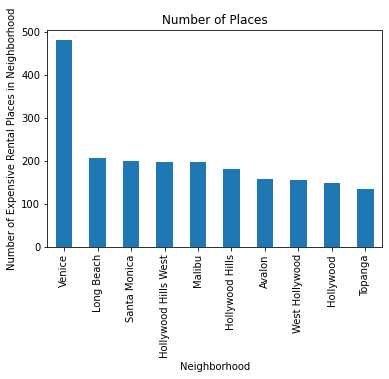

In [100]:
dff = ex['neighbourhood_cleansed'].value_counts()[:10]
dff.plot(kind = 'bar')
plt.ylabel('Number of Expensive Rental Places in Neighborhood')
plt.xlabel('Neighborhood')
plt.title('Number of Places')
plt.show()

## Based on obtained results, these 10 neighborhoods have most expensive rental places in LA.

In [101]:
ex['neighbourhood_cleansed'].value_counts().idxmax()

'Venice'

## And Venice has the most expensive rental place.

## Let's look at the deamanding rate again.

In [102]:
data['demanding_rate'].describe()

count    24978.000000
mean        51.389045
std         37.415114
min          0.000000
25%         16.666667
50%         46.666667
75%         95.555556
max        100.000000
Name: demanding_rate, dtype: float64

## if we want to find most demanding neighborhood in LA by Airbnb users.

In [103]:
ex2 = data[(data['demanding_rate']>90)]

In [104]:
ex2['neighbourhood_cleansed'].value_counts()[:10].sort_values(ascending=False)

Venice             394
Hollywood          305
Long Beach         263
Santa Monica       211
Downtown           182
Silver Lake        174
Glendale           164
West Hollywood     149
Hollywood Hills    137
Rowland Heights    133
Name: neighbourhood_cleansed, dtype: int64

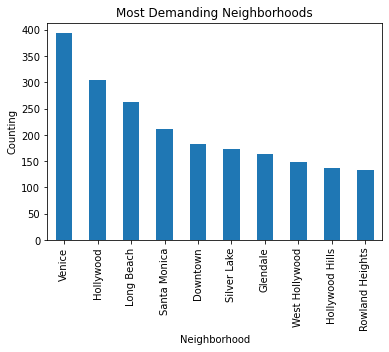

In [105]:
dff3 = ex2['neighbourhood_cleansed'].value_counts()[:10]
dff3.plot(kind = 'bar')
plt.ylabel('Counting')
plt.xlabel('Neighborhood')
plt.title('Most Demanding Neighborhoods')
plt.show()

## These neighboorhods are the most demanding neighborhood in LA. The amazing point is, most expensive neighborhoods are amost most demanding neighborhood too.

## Now we want to know which neighborhoods have best rating for review:

In [106]:
data['review_scores_rating'].describe()

count    24978.000000
mean         4.726545
std          0.474702
min          1.000000
25%          4.670000
50%          4.870000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [107]:
ex3 = data[(data['review_scores_rating']>4.9)]

In [108]:
ex3['neighbourhood_cleansed'].value_counts()[:10].sort_values(ascending=False)

Venice             545
Santa Monica       437
Long Beach         417
Hollywood          394
West Hollywood     273
Sherman Oaks       262
Hollywood Hills    250
Glendale           228
Silver Lake        217
Downtown           210
Name: neighbourhood_cleansed, dtype: int64

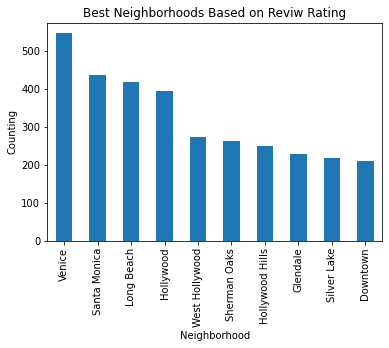

In [109]:
dff4 = ex3['neighbourhood_cleansed'].value_counts()[:10]
dff4.plot(kind = 'bar')
plt.ylabel('Counting')
plt.xlabel('Neighborhood')
plt.title('Best Neighborhoods Based on Reviw Rating')
plt.show()

## In this step, we would like to use the amenities data in a different way. First, we would like to define a new dataset that all rentals in it have 5 score in reviews and study the pricing and then add amenities to our study.

In [110]:
ex4 = data[(data['review_scores_rating']>=5)]

In [111]:
ex4.shape

(7434, 167)

In [112]:
data.shape

(24978, 167)

In [113]:
ex4['price'].value_counts()[:10].sort_values(ascending=False)

100.0    177
150.0    163
99.0     162
75.0     144
65.0     131
        ... 
236.0      4
206.0      4
31.0       4
268.0      4
10.0       4
Name: price, Length: 285, dtype: int64

In [114]:
ex4['price'].value_counts().idxmax()

100.0

## As we can see the most common rental price among best rental places based on reviews, is 100 dollar. So if we want to provide a rental place in LA for airbnb business, we know the rent price among 50 and 150 dollars are popular values among users of airbnb that want to travel to LA.

In [115]:
ex4['price'].describe()

count     7434.000000
mean       258.553269
std        568.762838
min          0.000000
25%         80.000000
50%        126.000000
75%        235.000000
max      10000.000000
Name: price, dtype: float64

In [116]:
data['price'].describe()

count    24978.000000
mean       209.254984
std        397.340634
min          0.000000
25%         77.000000
50%        122.000000
75%        205.000000
max      10000.000000
Name: price, dtype: float64

## As we can see, most expensive rentals are not located among places with best reviews. As we can see, the change is very meaningful after 75% max of rental prices.

## Now it is time to study amenities.

In [117]:
ex4['amenities'].value_counts()[:20].sort_values(ascending=False)

["Free parking on premises", "Shampoo", "Shower gel", "Dishes and silverware", "Bed linens", "TV with standard cable", "Stove", "Oven", "Pocket wifi", "Baking sheet", "Refrigerator", "Dryer", "Hot water", "Washer", "Microwave", "Hair dryer", "Cooking basics", "Dishwasher", "Iron", "Keypad", "Smoke alarm", "Barbecue utensils", "BBQ grill", "Kitchen", "Ethernet connection", "Coffee maker", "First aid kit", "Cable TV", "Air conditioning", "Extra pillows and blankets", "Backyard", "Essentials", "Pool", "Wifi", "Luggage dropoff allowed", "Long term stays allowed", "Hangers", "Indoor fireplace", "Lock on bedroom door", "Patio or balcony", "Carbon monoxide alarm", "Free street parking", "Fire extinguisher", "Dedicated workspace"]                                                                                                                                                                                                                                                                            

## Based on the results, most frequent amenitis in rentals with review score of 5 are: "Free parking on premises", "Shampoo", "Beach essentials", "Rice maker", "Shower gel", "Dishes and silverware", "Bed linens", "TV with standard cable", "Stove", "Oven", "Pocket wifi", "Baking sheet", "Refrigerator", "Dryer", "Portable fans", "Hot water", "Washer", "Microwave", "Hair dryer", "Trash compactor", "Cooking basics", "Pool table", "Wine glasses", "Dishwasher", "Iron", "Outdoor dining area", "Keurig coffee machine", "Smoke alarm", "Keypad", "Barbecue utensils", "BBQ grill", "Outdoor furniture", "Board games", "Kitchen", "Ethernet connection", "Heating", "First aid kit", "Sound system", "Coffee maker", "Cable TV", "Toaster", "Air conditioning", "Extra pillows and blankets", "Backyard", "Essentials", "Pool", "Body soap", "Wifi", "Fire pit", "Luggage dropoff allowed", "Long term stays allowed", "Cleaning products", "Freezer", "Hangers", "Piano", "Indoor fireplace", "Lock on bedroom door", "Dedicated workspace", "Conditioner", "Mini fridge", "Carbon monoxide alarm", "Patio or balcony", "Free street parking", "Fire extinguisher", "Bathtub".

In [118]:
ex4['amenities'].value_counts().idxmax()

'["Free parking on premises", "Shampoo", "Shower gel", "Dishes and silverware", "Bed linens", "TV with standard cable", "Stove", "Oven", "Pocket wifi", "Baking sheet", "Refrigerator", "Dryer", "Hot water", "Washer", "Microwave", "Hair dryer", "Cooking basics", "Dishwasher", "Iron", "Keypad", "Smoke alarm", "Barbecue utensils", "BBQ grill", "Kitchen", "Ethernet connection", "Coffee maker", "First aid kit", "Cable TV", "Air conditioning", "Extra pillows and blankets", "Backyard", "Essentials", "Pool", "Wifi", "Luggage dropoff allowed", "Long term stays allowed", "Hangers", "Indoor fireplace", "Lock on bedroom door", "Patio or balcony", "Carbon monoxide alarm", "Free street parking", "Fire extinguisher", "Dedicated workspace"]'

In [120]:
df = ex4['amenities'].value_counts()
df = df[:20]


In [121]:
df

["Free parking on premises", "Shampoo", "Shower gel", "Dishes and silverware", "Bed linens", "TV with standard cable", "Stove", "Oven", "Pocket wifi", "Baking sheet", "Refrigerator", "Dryer", "Hot water", "Washer", "Microwave", "Hair dryer", "Cooking basics", "Dishwasher", "Iron", "Keypad", "Smoke alarm", "Barbecue utensils", "BBQ grill", "Kitchen", "Ethernet connection", "Coffee maker", "First aid kit", "Cable TV", "Air conditioning", "Extra pillows and blankets", "Backyard", "Essentials", "Pool", "Wifi", "Luggage dropoff allowed", "Long term stays allowed", "Hangers", "Indoor fireplace", "Lock on bedroom door", "Patio or balcony", "Carbon monoxide alarm", "Free street parking", "Fire extinguisher", "Dedicated workspace"]                                                                                                                                                                                                                                                                            

In [122]:
da2 = ex4['amenities'].value_counts()
da2 = da2[:20]

In [123]:
remove_words = ['allowed']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

da2['amenities'] = ex4['amenities'].str.replace(pat, '', regex=True)

In [124]:
da2['amenities'] = da2['amenities'].str.replace('parking','', regex=True).str.strip('parking')

In [125]:
da2['amenities'] = da2['amenities'].str.replace('water','', regex=True).str.strip('water')

In [126]:
da2['amenities'] = da2['amenities'].str.replace('Hot','hot-water')

In [127]:
da2['amenities'] = da2['amenities'].str.replace('Free','free-parking')



All frequencies, including STOPWORDS:
            Word  Frequency
0             ``     245444
1              ,     221856
2             ''     210891
3          alarm      13321
4          dryer      11619
5   free-parking       9513
6             on       9064
7            and       8360
8           wifi       7589
9     essentials       7585
10            tv       7574
11     hot-water       7561


Text(0.5, 1.0, 'Most Favorite Amenities Based on Reviews Rating')

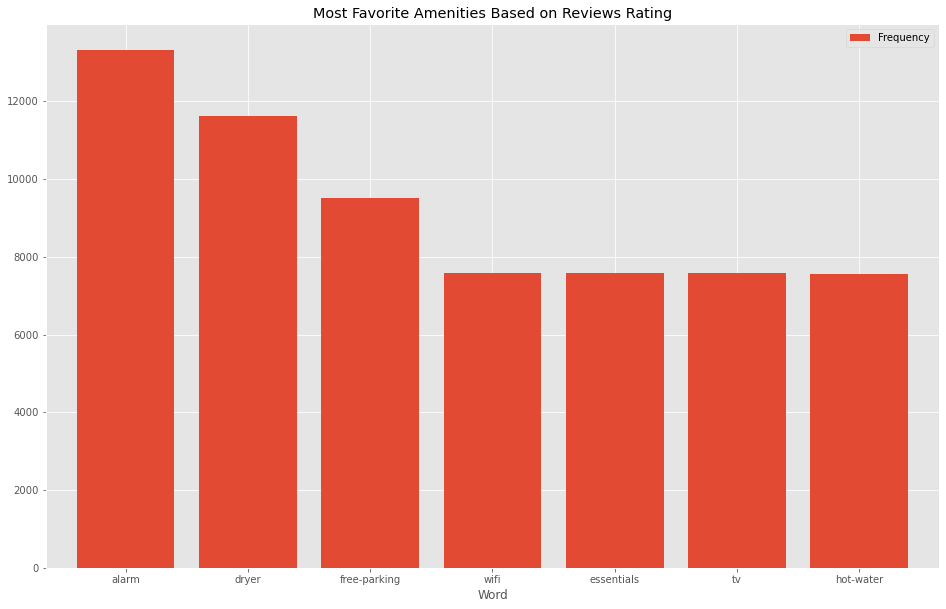

In [128]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk

top_N = 12


txt7 = da2.amenities.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt7)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N)[3:10],
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

#rslt.plot.bar(rot=0)
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.title('Most Favorite Amenities Based on Reviews Rating')

## As we can see, these amenities are the most favorite ones in those rentals that have best reviews (for sure we ignore some words like [ or ]. If someone would like to buys amenities for his rental, these ones can be as best profitable options to buy.

## If we want to see which amenities are most favorite ones based on demanding:

In [129]:
da3 = ex2['amenities'].value_counts()
da3 = da3[:20]

In [130]:
remove_words = ['allowed']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

da3['amenities'] = ex2['amenities'].str.replace(pat, '')

In [131]:
da3['amenities'] = da3['amenities'].str.replace('parking','', regex=True).str.strip('parking')

In [132]:
da3['amenities'] = da3['amenities'].str.replace('Free','free-parking')

All frequencies, including STOPWORDS:
            Word  Frequency
0             ``     203934
1              ,     185956
2             ''     181092
3          alarm      12252
4          dryer      10797
5   free-parking       8370
6             on       7503
7             tv       7425
8     essentials       7144
9            and       7134
10          wifi       7081
11             [       7062


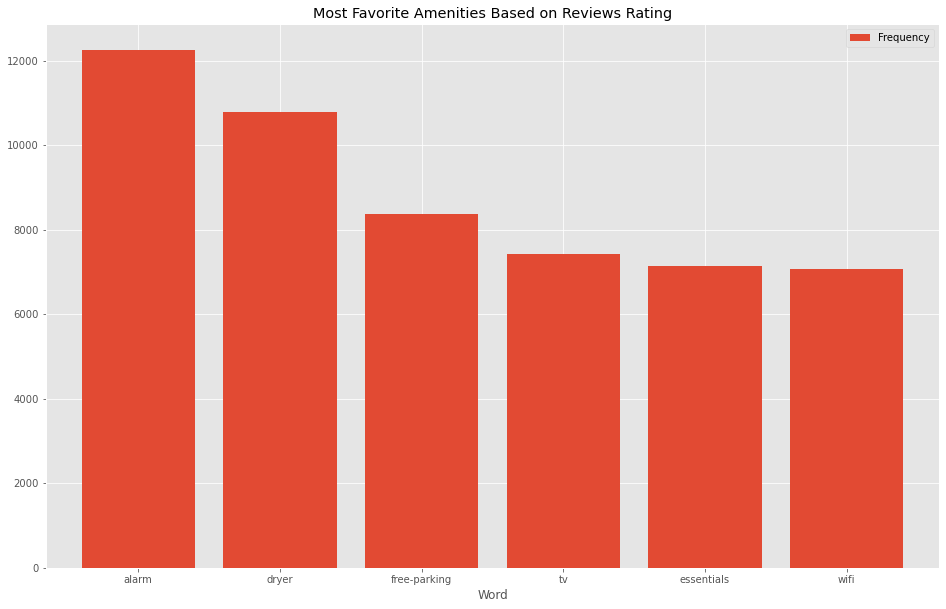

In [133]:
top_N =12


txtt = da3.amenities.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txtt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N)[3:9],
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

#rslt.plot.bar(rot=0)
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.title('Most Favorite Amenities Based on Reviews Rating')
da3['amenities'] = da3['amenities'].str.replace('parking','', regex=True).str.strip('parking')

## As we can see, these amenities are the most favorite ones in those rentals that have high demanding rates. 

## As an application for end user:

Enter your neighborhood: Hollywood
The most popular accomodation size in this neighborhood:  3
The best number of bath in this neighborhood:  1
The best style of bath in this neighborhood:  bath
The best number of beds in this neighborhood:  2
All frequencies, including STOPWORDS:
            Word  Frequency
0             ``       6428
1              ,       5842
2             ''       5714
3          alarm        418
4          dryer        380
5             tv        258
6   free-parking        244
7           wifi        243
8     essentials        239
9        kitchen        237
10         smoke        234
11            on        233
The mean of rental price this neighborhood:  171
The price description in this neighborhood: count     244.000000
mean      171.040984
std       256.265596
min        22.000000
25%        75.000000
50%       102.500000
75%       158.500000
max      2800.000000
Name: price, dtype: float64


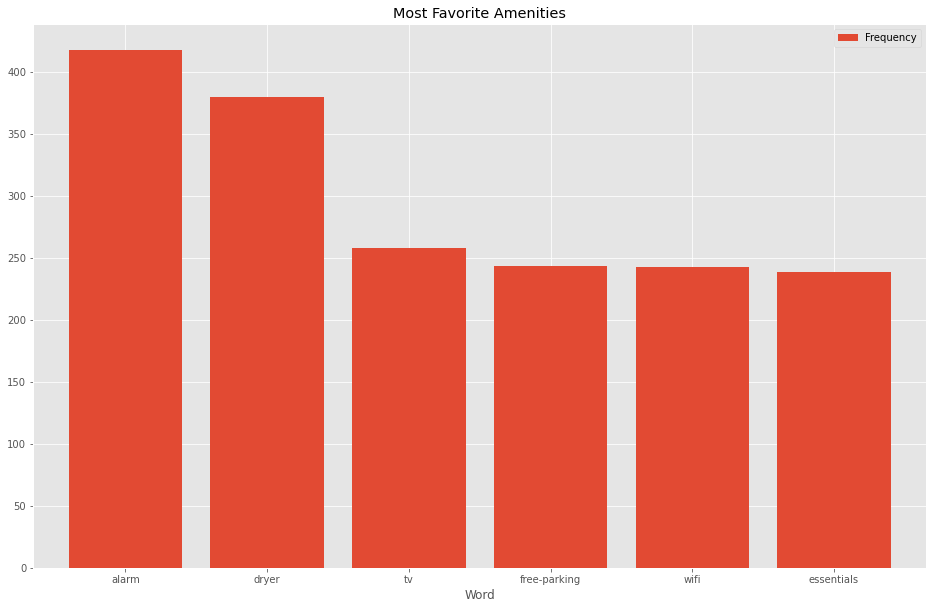

In [135]:
val = input("Enter your neighborhood: ")
AI = data[data['neighbourhood_cleansed'].str.contains(val)]
AI = AI[(AI['demanding_rate']>=100)]
AI = AI[(AI['review_scores_rating']>=5)]
df1 = AI['accommodates'].mean()
print('The most popular accomodation size in this neighborhood: ', round(df1))
df2 = AI['numberofbath'].mean()
print('The best number of bath in this neighborhood: ', round(df2))
df3 = AI['Bath'].value_counts().idxmax()
print('The best style of bath in this neighborhood: ', df3)
df4 = AI['beds'].mean()
print('The best number of beds in this neighborhood: ', round(df4))
## Amenities
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk

daa = AI['amenities'].value_counts()
daa = daa[:40]


remove_words = ['allowed']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

daa['amenities'] = AI['amenities'].str.replace(pat, '')
daa['amenities'] = daa['amenities'].str.replace('parking','', regex=True).str.strip('parking')
daa['amenities'] = daa['amenities'].str.replace('[','', regex=True).str.strip('[')
daa['amenities'] = daa['amenities'].str.replace(']','', regex=True).str.strip(']')
daa['amenities'] = daa['amenities'].str.replace('Free','free-parking')

top_N =12


txtt = daa.amenities.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txtt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N)[3:9],
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

#rslt.plot.bar(rot=0)
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.title('Most Favorite Amenities')
####
df5 = AI['price'].mean()
print('The mean of rental price this neighborhood: ', round(df5))
print('The price description in this neighborhood:', AI['price'].describe())



In [22]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


# Now AI

In [23]:
!pip install xgboost==1.0.1

In [24]:
import xgboost

In [25]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

In [26]:
val1 = input("Enter your neighborhood: ")
data2 = data
data2 = data2.dropna(axis=0, subset=['accommodates'])
data2 = data2.dropna(axis=0, subset=['bedrooms'])
data2 = data2.dropna(axis=0, subset=['beds'])
data2 = data2.dropna(axis=0, subset=['numberofbath'])
data2 = data2.dropna(axis=0, subset=['number_of_amenities'])
data2 = data2.dropna(axis=0, subset=['price'])
AI2 = data2[data2['neighbourhood_cleansed'].str.contains(val1)]
AI2 = AI2[(AI2['demanding_rate']>=100)]
AI2 = AI2[(AI2['review_scores_rating']>=5)]

x = AI2[['accommodates','bedrooms','beds','numberofbath','number_of_amenities']]
y = AI2[['price']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test = train_test_split(x, test_size=0.2, random_state=25)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=25)
#print(x)
#print(x.info())
#print(y)
#print(y.info())
#regressor2 = RandomForestRegressor(random_state = 1)
#regressor2.fit(x, y)
model_xb_3 = MultiOutputRegressor(xgb.XGBRegressor(gamma=0,                 
    learning_rate=0.01,
    max_depth=9,
    n_estimators=150,                                                                    
    subsample=0.8,
    num_parallel_tree=1,
    colsample_bylevel=1,
    scale_pos_weight=1,
    random_state=34))
model_xb_3.fit(x_train, y_train)
y_pred_train_xb_3 = model_xb_3.predict(x_train)
y_pred_test_xb_3 = model_xb_3.predict(x_test)
print('R2 score of training set is {}',format(r2_score(y_train, y_pred_train_xb_3)))
print('R2 score of testing set is {}',format(r2_score(y_test, y_pred_test_xb_3)))

val2 = int(input("Enter number of your accommodates: "))
val3 = int(input("Enter number of your bedrooms: "))
val4 = int(input("Enter number of your beds: "))
val5 = int(input("Enter number of your bath: "))
val6 = int(input("Enter number of your amenities: "))


val_final = np.array([[val2, val3, val4, val5, val6]]) 
#print(val_final)
#y_trainP2 = poly_model.predict(val_final)
y_pred_test_xb_3_j = model_xb_3.predict(val_final)
#print(y_trainP2)
print('The best price for your rental is: {}'.format(y_pred_test_xb_3_j))

Enter your neighborhood: Hollywood
R2 score of training set is {} 0.7130771526424851
R2 score of testing set is {} 0.382703205753151
Enter number of your accommodates: 6
Enter number of your bedrooms: 3
Enter number of your beds: 6
Enter number of your bath: 3
Enter number of your amenities: 30
The best price for your rental is: [[591.8825]]


In [27]:
val1 = input("Enter your neighborhood: ")
data2 = data
data2 = data2.dropna(axis=0, subset=['accommodates'])
data2 = data2.dropna(axis=0, subset=['bedrooms'])
data2 = data2.dropna(axis=0, subset=['beds'])
data2 = data2.dropna(axis=0, subset=['numberofbath'])
data2 = data2.dropna(axis=0, subset=['number_of_amenities'])
data2 = data2.dropna(axis=0, subset=['price'])
AI2 = data2[data2['neighbourhood_cleansed'].str.contains(val1)]
AI2 = AI2[(AI2['demanding_rate']>=100)]
AI2 = AI2[(AI2['review_scores_rating']>=5)]

x = AI2[['accommodates','bedrooms','beds','numberofbath','number_of_amenities']]
y = AI2[['price']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test = train_test_split(x, test_size=0.2, random_state=25)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=25)
#print(x)
#print(x.info())
#print(y)
#print(y.info())
#regressor2 = RandomForestRegressor(random_state = 1)
#regressor2.fit(x, y)
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(max_depth = 2, n_estimators = 20, random_state = 1)
regressor2.fit(x_train, y_train.values.ravel())
y_pred2ts = regressor2.predict(x_test)
# Evaluating the Algorithm
y_pred2tr = regressor2.predict(x_train)
print('R2 score of training set is {}',format(r2_score(y_train, y_pred2tr)))
print('R2 score of testing set is {}',format(r2_score(y_test, y_pred2ts)))

val2 = int(input("Enter number of your accommodates: "))
val3 = int(input("Enter number of your bedrooms: "))
val4 = int(input("Enter number of your beds: "))
val5 = int(input("Enter number of your bath: "))
val6 = int(input("Enter number of your amenities: "))


val_final = np.array([[val2, val3, val4, val5, val6]]) 
#print(val_final)
#y_trainP2 = poly_model.predict(val_final)
y_pred2ts_j = regressor2.predict(val_final)
print('The best price for your rental is: {}'.format(y_pred2ts_j))

Enter your neighborhood: Hollywood
R2 score of training set is {} 0.7606510224366504
R2 score of testing set is {} 0.47227048135994243
Enter number of your accommodates: 6
Enter number of your bedrooms: 3
Enter number of your beds: 6
Enter number of your bath: 3
Enter number of your amenities: 30
The best price for your rental is: [503.4205251]
